# Redes Neuronales

En este notebook vamos a construir la unidad básica de las redes neuronales, el Perceptrón. Tiene dos partes:
1. **Perceptrón 2D**: vamos a entrenar un Perceptrón con Keras sobre un dataset ficticio. Exploramos cómo son las fronteras en 2D. Limitaciones del Perceptrón. Generamos un dataset no-linealmente separable y vemos cómo responde el Perceptrón.
2. **MNIST**: vamos a trabajar con este conocido dataset. El objetivo es identificar dígitos, del 0 al 9, escritos a manos. Primero entrenaremos una red neuronal de una capa y luego una Red Neuronal de más capas.

## 1. Perceptrón en 2D

Vamos a generar un dataset sintético con unas funciones que ya vienen incorporadas en scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
# X, y = make_blobs(n_samples=1000, centers=2, n_features=2,
#                   random_state=0)

# X, y = make_moons(n_samples=1000, random_state=0)

X, y = make_circles(n_samples=1000, random_state=0)

In [3]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


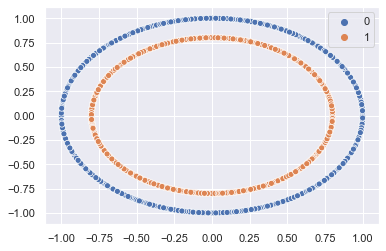

In [4]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Reescalamos los datos

In [5]:
X[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

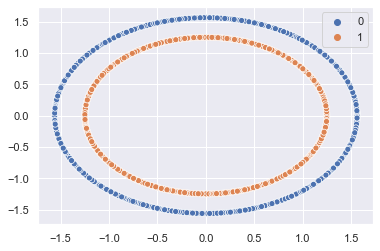

In [6]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.show()

Definimos el modelo a entrenar y volvemos a mirar algunas de sus características.

In [7]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X, y, epochs=150, validation_split=0.25)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 750 samples, validate on 250 samples
Epoch 1/150





750/750 [==============================] - 1s 2ms/step - loss: 0.6980 - acc: 0.4973 - val_loss: 0.6879 - val_acc: 0.5080
Epoch 2/150
750/750 [==============================] - 0s 119us/step - loss: 0.6892 - acc: 0.4973 - val_loss: 0.6818 - val_acc: 0.5080
Epoch 3/150
750/750 [==============================] - 0s 99us/step - loss: 0.6831 - acc: 0.4973 - val_loss: 0.6788 - val_acc: 0.5080
Epoch 4/150
750/750 [==============================] - 0s 92us/step - loss: 0.6798 - acc: 0.4973 - val_loss: 0.6771 - val_acc: 0.5080
Epoch 5/150
750/750 [==============================] - 0s 100us/step - loss: 0.6777 - acc: 0.5000 - val_loss: 0.6762 - val_acc: 0.5240
Epoch 6/150
750/750 [==============================] - 0s 92us/step - loss: 0.6764 - acc: 0.5093 - val_loss: 0.6755 - val_acc: 0.5240
Epoch 7/150
750/750 [=======================

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [11]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Notar que se agregaron una keys, asociadas al set de validación. Grafiquemos.

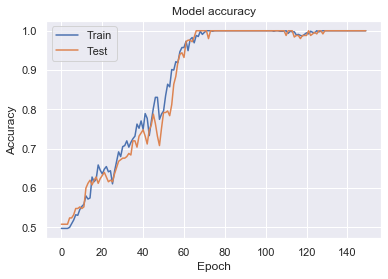

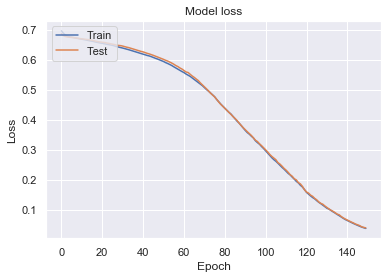

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

¿Cuántos parámetros tiene ahora el modelo?

In [13]:
print(model.get_weights())

[array([[-0.55487996,  0.24358664, -1.078224  ,  0.42650387, -0.07354499,
         0.58375853,  0.7579113 ,  0.87238973,  0.40367174, -0.5303952 ],
       [-0.2645807 , -0.74597186,  0.5047522 ,  0.03486434,  0.7707157 ,
        -0.39109138,  0.5582799 , -0.08264153,  1.0294623 , -0.8291235 ]],
      dtype=float32), array([-0.34701252, -0.20999403, -0.55999106,  0.9839215 , -0.00597809,
       -0.35599443, -0.42199215, -0.5279928 , -0.3199426 , -0.55999994],
      dtype=float32), array([[ 7.0733154e-01, -3.4769323e-01,  2.5423777e-01,  4.9505439e-01,
         1.2474622e+00],
       [ 9.4093651e-01, -7.2982728e-01, -4.2535341e-01,  1.5403134e+00,
         1.1403636e+00],
       [ 5.9870738e-01, -6.8938965e-01, -3.0409300e-01,  9.0930957e-01,
         8.5537106e-01],
       [-6.6754299e-01,  1.5118003e+00, -2.2878906e-01, -6.8020779e-01,
        -5.7994968e-01],
       [ 1.6992459e-01, -2.0562223e-01, -4.2116737e-01,  7.8323591e-01,
         3.3987418e-01],
       [ 1.1151553e+00, -6.392

Y graficamos las fronteras de decisión. ¿Notan que ya no es una frontera abrupta, sino que hay una zona de cambio?¿A qué se debe?

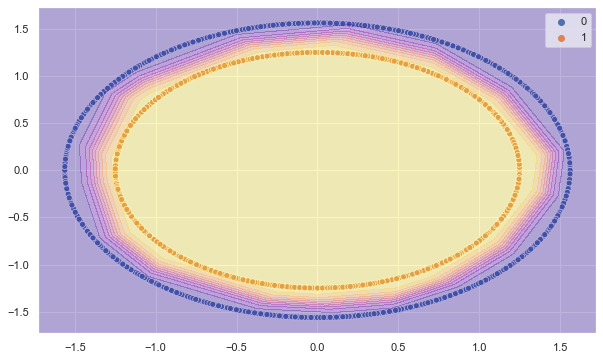

In [14]:
plt.figure(figsize = (10,6))

ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
contours = ax.contourf(xx, yy, Z, levels = 10, alpha=0.3, cmap = 'plasma')
plt.show()

**Ejercicio:** volver a correr esta sección, pero reemplazando la función que genera los datos `make_blobs` por `make_moons`. ¿Qué problema ven en el resultado?¿Y si hacen lo mismo para `make_circles?`

**Ejercicio**: con los datos producidos por `make_moons`, agregar una capa a la red neuronal, con 10 neuronas y función de activación `relu`.

**Ejercicio**: repetir el ejercicio anterior, pero para los datos producidos por `make_circles`.

## 2. MNIST

El dataset de MNIST es un dataset muy conocido. Consiste en dígitos escritos a mano. Muchas modelos de redes neuronales son probados primeros en este set. Pueden encontrar una descripción más detallada, y un ranking de modelos con su desempeño, en el siguiente link.

https://en.wikipedia.org/wiki/MNIST_database

Vamos a arrancar con una sola capa, con una activación `softmax`, ya que se trata de diez clases.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os #esta libreria permite trabajar con funciones del sistema operativo 
import random

from sklearn.model_selection import train_test_split

**1. Carga de datos**

Cada instancia del dataset es una imagen guardada en una carpeta con la etiqueta correspondiente.

In [16]:
directorio = 'Datasets/MNIST/'

Miramos las carpetas que hay adentro de la carpeta MNIST

In [17]:
print(os.listdir(directorio))

['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


Creamos los contenedores vacíos

In [18]:
todas_imagenes = []
y_todas_imagenes = []

y los llenamos.

In [19]:
digitos = np.arange(0,10)
for digito in digitos:
    directorio = 'Datasets/MNIST/' + str(digito) + '/'
    print(digito, directorio)
    print('Hay', len(os.listdir(directorio)),'imagenes')
    for imagen in os.listdir(directorio):
        todas_imagenes.append(plt.imread(directorio + imagen))
        y_todas_imagenes.append(digito)
        
todas_imagenes = np.array(todas_imagenes)
y_todas_imagenes = np.array(y_todas_imagenes)

0 Datasets/MNIST/0/
Hay 4132 imagenes
1 Datasets/MNIST/1/
Hay 4684 imagenes
2 Datasets/MNIST/2/
Hay 4177 imagenes
3 Datasets/MNIST/3/
Hay 4351 imagenes
4 Datasets/MNIST/4/
Hay 4072 imagenes
5 Datasets/MNIST/5/
Hay 3795 imagenes
6 Datasets/MNIST/6/
Hay 4137 imagenes
7 Datasets/MNIST/7/
Hay 4401 imagenes
8 Datasets/MNIST/8/
Hay 4063 imagenes
9 Datasets/MNIST/9/
Hay 4188 imagenes


In [20]:
print(todas_imagenes.shape, y_todas_imagenes.shape)


(42000, 28, 28) (42000,)


**2. Preprocesado**

**Ejercicio:** Mirar el `shape` de `X` y responder: ¿Cuántas instancias son?¿Qué ancho y largo tienen las imágenes?¿Cuántas bandas?

In [26]:
print(todas_imagenes.shape, y_todas_imagenes.shape)
n_instancias = todas_imagenes.shape[0]
ancho_imagen = todas_imagenes.shape[1]
largo_imagen = todas_imagenes.shape[2]

(42000, 28, 28) (42000,)


Miramos una imagen al azar.

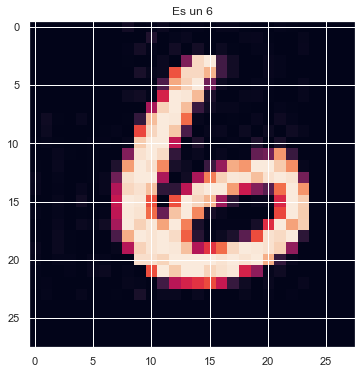

In [29]:
idx_imagen = np.random.randint(0,todas_imagenes.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_todas_imagenes[idx_imagen]))
plt.imshow(todas_imagenes[idx_imagen, :, :])
plt.show()

**Ejercicio:** Crear un arreglo `X` que sea igual a `todas_imagenes`, pero de forma `(n_instancias, largo_imagen * ancho_imagen)`.

In [30]:
X = todas_imagenes.reshape(n_instancias, largo_imagen*ancho_imagen)
print(X.shape)

(42000, 784)


**Ejercicio:** Reescalar las imágenes entre 0 y 1.

In [31]:
X = X/255

**Ejercicio:** usar el `to_categorical` de Keras para llevar `y_todas_imagenes` a una columna con unos y ceros para cada clase `y` (One Hot Encoding).

In [32]:
from keras.utils import to_categorical
y = to_categorical(y_todas_imagenes)
print(y.shape)

(42000, 10)


**Ejercicio:** hacer un `train_test_split`. Usar el 20% del dataset como conjunto de test. Fijar el random state en 42.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**3. Entrenamiento del modelo**

Comenzar entrenando un Red Neuronal de una capa, con diez neuronas, función de activación `softmax` y pérdida `categorical_crossentropy`. Usar como optimizador `Adam` y `epoch = 20`.

In [36]:
from keras.models import Sequential
from keras.layers import Dense
import keras

model = Sequential()
model.add(Dense(10, activation='softmax'))


optimizador = keras.optimizers.Adam(lr=0.001, beta_1=0.0, beta_2=0.0, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=optimizador,loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, y, epochs=20, validation_split=0.1)


Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 6s 150us/step - loss: 0.4789 - acc: 0.8699 - val_loss: 15.8671 - val_acc: 0.0026
Epoch 2/20
37800/37800 [==============================] - 4s 114us/step - loss: 0.3916 - acc: 0.9074 - val_loss: 15.8986 - val_acc: 0.0026
Epoch 3/20
37800/37800 [==============================] - 5s 128us/step - loss: 0.4377 - acc: 0.9119 - val_loss: 15.9515 - val_acc: 0.0026
Epoch 4/20
37800/37800 [==============================] - 4s 115us/step - loss: 0.4725 - acc: 0.9140 - val_loss: 15.9833 - val_acc: 0.0026
Epoch 5/20
37800/37800 [==============================] - 4s 118us/step - loss: 0.5013 - acc: 0.9159 - val_loss: 15.9900 - val_acc: 0.0026
Epoch 6/20
37800/37800 [==============================] - 5s 131us/step - loss: 0.5230 - acc: 0.9168 - val_loss: 16.0122 - val_acc: 0.0026
Epoch 7/20
37800/37800 [==============================] - 5s 120us/step - loss: 0.5373 - acc: 0.9182 - val_loss: 16.0

**Ejercicio:** ¿cuántos parámetros tiene el modelo? Recordar que hay una función de Keras que hace un *informe* de la red neuronal.

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Ejercicio:** Graficar la pérdida y la exactitud en función de *epochs* para validación y entrenamiento.

https://keras.io/visualization/

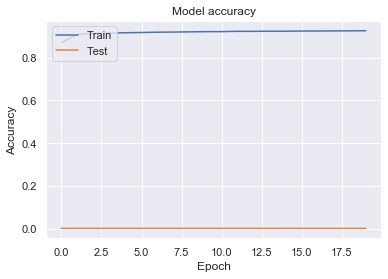

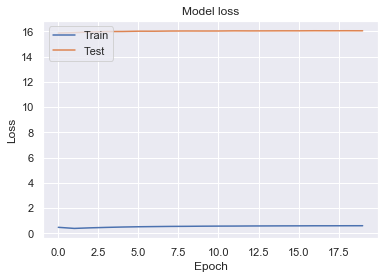

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**4. Evaluación de los resultados.**

**Ejercicio**: predecir las etiquetas de todo el set de testeo.

In [ ]:
y_test_pred = model.COMPLETAR(COMPLETAR)

Esto sirve para pasar de probabilidades a la etiqueta en sí. En este caso, la etiqueta es el dígito, y corresponde al número de columna.

In [ ]:
y_test_pred = np.argmax(y_test_pred, axis = 1)
y_test_pred.shape

**Ejercicio:** Calcular exactitud y la matriz de confusión para el conjunto de entrenamiento.

In [ ]:
from sklearn.metrics import confusion_matrix

y_test = np.argmax(y_test,axis = 1)

COMPLETAR(COMPLETAR, COMPLETAR)

In [ ]:
from sklearn.metrics import accuracy_score

COMPLETAR

**Ejercicio:** ¿Dónde se está confundiendo? Graficar algunos ejemplos.

In [ ]:
errores = COMPLETAR != COMPLETAR

In [ ]:
imagenes_errores = X_test[COMPLETAR,:]
y_test_errores = y_test[COMPLETAR]
y_test_pred_errores = y_test_pred[COMPLETAR]
print(imagenes_errores.shape)

In [ ]:
imagenes_errores = imagenes_errores.reshape(imagenes_errores.shape[0], ancho_imagen, largo_imagen)
print(imagenes_errores.shape)

In [ ]:
idx_imagen = np.random.randint(0,imagenes_errores.shape[0])
plt.figure(figsize = (6,6))
plt.title('Es un ' + str(y_test_errores[idx_imagen]) +'. Fue etiquetado como ' + str(y_test_pred_errores[idx_imagen]))
plt.imshow(imagenes_errores[idx_imagen, :, :])
plt.show()

**Ejercicio:** Volver a entrenar, pero agregando una capa con 800 neuronas y función de activación `relu`.